In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 8
NUM_EPOCH = 10

train_path = "/content/gdrive/My Drive/app/xray/chest_xray/train"
valid_path = "/content/gdrive/My Drive/app/xray/chest_xray/val"

In [13]:
inception_v3 = InceptionV3(input_shape=IMAGE_SIZE+[3], weights=None, include_top=False)
#for layer in inception_v3.layers:
#  layer.trainable = False

folders = glob("/content/gdrive/My Drive/app/xray/chest_xray/train/*")

x = Flatten()(inception_v3.output)
prediction  = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception_v3.input, outputs=prediction)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 111, 111, 32) 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 111, 111, 32) 0           batch_normalization_189[0][0]    
__________________________________________________________________________________________________
conv2d_190

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')
valid_set = test_datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Epoch 1/10
652/652 [==============================] - 237s 364ms/step - loss: 4.1448 - acc: 0.7423 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
652/652 [==============================] - 213s 327ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
652/652 [==============================] - 213s 327ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
652/652 [==============================] - 213s 327ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
652/652 [==============================] - 213s 327ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
652/652 [==============================] - 213s 327ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
652/652 [==============================] - 214s 328ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
652/652 [============================

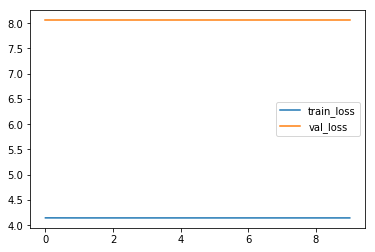

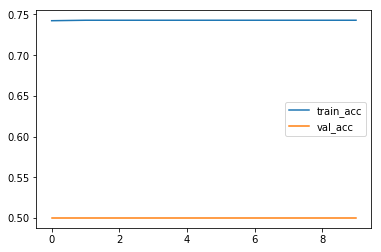

<Figure size 432x288 with 0 Axes>

In [15]:
rr=model.fit_generator(training_set, validation_data=valid_set, epochs=NUM_EPOCH, steps_per_epoch=len(training_set), validation_steps=len(valid_set))

plt.plot(rr.history['loss'], label='train_loss')
plt.plot(rr.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/inception_v3/Lossval_loss")

plt.plot(rr.history['acc'], label='train_acc')
plt.plot(rr.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/inception_v3/Lossval_acc")

model.save("/content/gdrive/My Drive/app/xray/inception_v3/model_inception_v3.h5")